In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib

Using matplotlib backend: module://ipympl.backend_nbagg


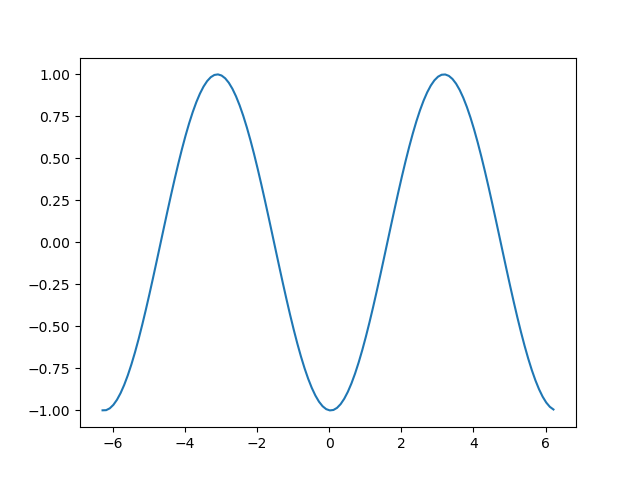

In [29]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

plt.ion()
for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x+delay)
    plt.clf()
    plt.plot(x, y)
    plt.draw()
    plt.gcf().canvas.flush_events()
    time.sleep(0.02)
plt.ioff()
plt.show()

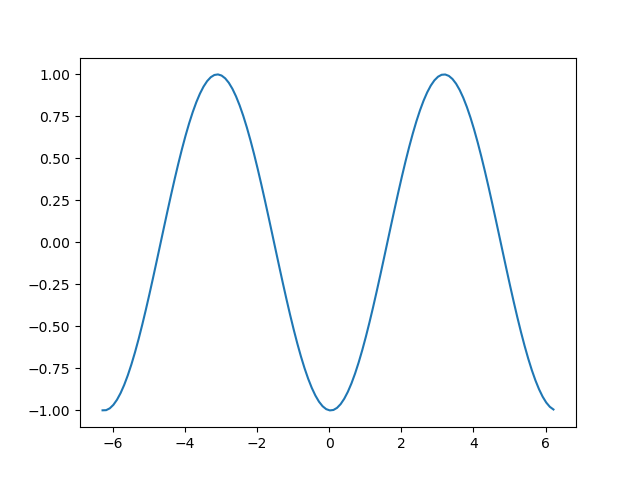

In [30]:
plt.ion()
fig , ax = plt.subplots()
y = np.cos(x)
line, = ax.plot(x, y)

for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x+delay)
    line.set_ydata(y)
    plt.draw()
    plt.gcf().canvas.flush_events()
    time.sleep(0.02)
plt.ioff()
plt.show()

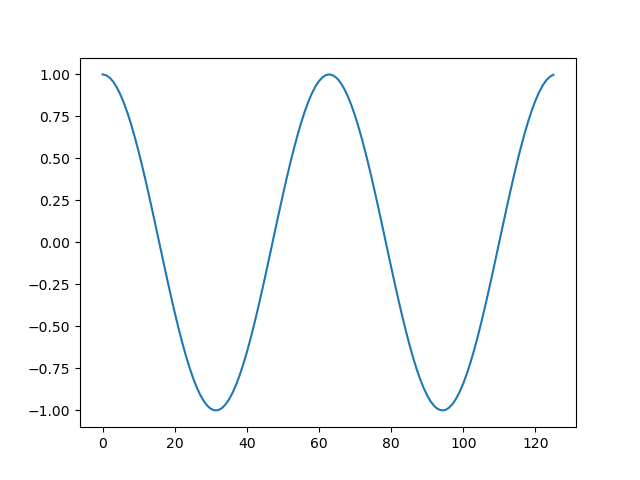

MovieWriter imagemagick unavailable; using Pillow instead.


In [37]:
from matplotlib.animation import FuncAnimation
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
fig , ax = plt.subplots()
line, = ax.plot(np.cos(x))


def update_cos(frame, line, x):
    line.set_ydata(np.cos(x + frame))
    return [line]

phasa = np.arange(0, 4*np.pi, 0.1)

animation = FuncAnimation(
    fig,
    func=update_cos,
    frames=phasa, # параметр, меняющийся от кадра к кадру
    fargs=(line, x), # параметры для func
    interval=30, # задержка между кадрами в мс
    blit=True,
    repeat=False
)

plt.show()

animation.save('.//tmp//animation.gif', writer='imagemagick', fps=30)

In [41]:
from matplotlib.animation import ArtistAnimation
fig = plt.figure(figsize=(10, 6))
ax_3d = fig.add_subplot(projection='3d')
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.arange(-2*np.pi, 2*np.pi, 0.2)
xgrid, ygrid = np.meshgrid(x, y)
phase = np.arange(0, 2*np.pi, 0.1)
frames = []
for p in phase:
    zgrid = np.sin(xgrid+p) * np.sin(ygrid) / (xgrid * ygrid)
    line = ax_3d.plot_surface(xgrid, ygrid, zgrid, color='b')
    frames.append([line])
animation = ArtistAnimation(fig, frames, interval=30, blit=True, repeat=True)
animation.save('.//tmp//animation_3d.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.
